In [ ]:
### For colab, run the following codes
# from google.colab import drive
# drive.mount('/content/gdrive')

### cd to your directory
# %cd /content/gdrive/MyDrive/Your_Dir

### cd to polygon-yolov5
# %cd polygon-yolov5

### install requirements
# !pip install -r requirements.txt

### install cuda extensions for polygon box iou computation
# %cd utils/iou_cuda
# !python setup.py install

### cd back
# %cd ..
# %cd ..

# 1. Inference

`polygon_detect.py` runs polygon-enabled YOLOv5 inference on a variety of sources, and saving results to `runs/detect`.

In [3]:
from IPython.display import Image

!python polygon_detect.py --weights polygon_best.pt --img 640 --conf 0.75 \
    --source data/images/armor --iou-thres 0.4
Image(filename='runs/detect/exp/1070.png', width=1024)

Notice: polygon_detect.py is designed for polygon cases
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.75, device='', exist_ok=False, half=False, hide_conf=False, hide_labels=False, imgsz=640, iou_thres=0.4, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/armor', update=False, view_img=False, weights=['polygon_best.pt'])
YOLOv5 🚀 v1.0-24-gd5926bb torch 1.9.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24265.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPs
Used              	Free              	Total             
2.002 GB    8.45%    	21.694 GB    91.55%   	23.70
image 1/33 /home/zq/PolygonObjectDetection/polygon-yolov5/data/images/armor/x1red10001.jpg: 480x640 1 armor, Done. (0.011s)
image 2/33 /home/zq/PolygonObjectDetection/polygon-yolov5/data/images/armor/x1red10012.jpg: 480x640 1 armor, Done. (0.007s)
image 3/33 /home/

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp/1070.png'

# 2. Test
Test the polygon model's accuracy on a subset of [UCAS-AOD] dataset (https://github.com/XinzeLee/PolygonObjectDetection/tree/main/UCAS50). To show results by class use the `--verbose` flag.

In [2]:
# Run Polygon_Yolov5s on a subset of UCAS-AOD
!python polygon_test.py --weights polygon-yolov5s-ucas.pt --data polygon_ucas.yaml --img 1024 --iou 0.65 --task val

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/polygon_ucas.yaml', device='', exist_ok=False, half=False, imgsz=1024, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['polygon-yolov5s-ucas.pt'])
YOLOv5 🚀 0d55d0b torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Fusing layers... 
/home/xinzeli831/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7067395 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning '../UCAS50/val' images and labels...:   0%| | 0/9 [00:00<

# 3. Train

Train a polygon-YOLOv5s model on [UCAS-AOD train](https://github.com/XinzeLee/PolygonObjectDetection/tree/main/UCAS50) with `--data polygon_ucas.yaml`, starting from pretrained `--weights polygon-yolov5s-ucas.pt`, or from randomly initialized `--weights '' --cfg polygon_yolov5s_ucas`.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

## 3.1 Autoanchor
* Run utils.polygon_kmean_anchors to generate **predefined anchors** for your specific datasets with specified image size.
* Notice: For polygon anchor boxes, **minimum outter bounding box** of polygon is used in the kmeans anchor selection.

In [3]:
from utils.autoanchor import polygon_kmean_anchors

nl = 3 # number of anchor layers
na = 3 # number of anchors
img_size = 640 # image size for training and testing

datacfg = "data/polygon_armor.yaml"
anchors = polygon_kmean_anchors(datacfg, n=nl*na, gen=3000, img_size=img_size)
print(anchors.reshape(nl, na*2).astype(int))
print('\nPlease Copy the anchors to your model configuration polygon_yolov5*.yaml')

Scanning '../armor293/train.cache' images and labels... 293 found, 0 missing, 0 empty, 51 corrupted: 100%|██████████| 293/293 [00:00<?, ?it/s]


autoanchor: Running kmeans for 9 anchors on 242 points...
autoanchor: thr=0.25: 1.0000 best possible recall, 7.48 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.519/0.931-mean/best, past_thr=0.583-mean: 29,12,  42,17,  47,20,  71,31,  85,41,  98,42,  101,79,  167,72,  181,80


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.9321:  12%|█▏        | 355/3000 [00:00<00:00, 3542.33it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.48 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.518/0.931-mean/best, past_thr=0.583-mean: 29,12,  42,17,  47,20,  71,31,  85,41,  98,42,  101,79,  167,72,  181,80
autoanchor: thr=0.25: 1.0000 best possible recall, 7.48 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.518/0.931-mean/best, past_thr=0.583-mean: 29,12,  42,17,  47,20,  71,31,  85,41,  97,42,  101,79,  168,72,  182,80
autoanchor: thr=0.25: 1.0000 best possible recall, 7.46 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.518/0.931-mean/best, past_thr=0.584-mean: 29,12,  43,17,  47,20,  71,31,  85,42,  99,41,  103,79,  166,72,  181,80
autoanchor: thr=0.25: 1.0000 best possible recall, 7.46 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.518/0.931-mean/best, past_thr=0.584-mean: 29,12,  43,17,  47,20,  71,31,  85,42,  99,41,  103,79,  166,72,  181,80
autoanchor: thr=0.25: 1.0000 best possible recall, 7.44 anchors past thr

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.9321:  27%|██▋       | 822/3000 [00:00<00:00, 4203.32it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.517/0.932-mean/best, past_thr=0.585-mean: 28,12,  43,17,  47,19,  70,31,  85,42,  96,41,  103,82,  170,72,  183,81


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.9324:  56%|█████▌    | 1666/3000 [00:00<00:00, 4170.98it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.44 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.932-mean/best, past_thr=0.583-mean: 28,12,  43,17,  47,20,  70,31,  85,42,  96,41,  103,81,  169,72,  183,82
autoanchor: thr=0.25: 1.0000 best possible recall, 7.44 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.932-mean/best, past_thr=0.583-mean: 28,12,  43,17,  47,20,  70,31,  85,43,  97,41,  103,81,  168,72,  183,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.44 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.932-mean/best, past_thr=0.583-mean: 28,12,  43,17,  46,20,  70,31,  86,43,  98,41,  103,81,  168,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.44 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.932-mean/best, past_thr=0.583-mean: 28,12,  43,17,  47,20,  70,31,  86,43,  98,41,  103,81,  168,72,  183,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.44 anchors past thr

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.9328:  86%|████████▌ | 2577/3000 [00:00<00:00, 4383.22it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.43 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.583-mean: 28,12,  43,17,  47,19,  70,31,  86,43,  97,41,  103,81,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.43 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.583-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  170,72,  183,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.39 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.585-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.39 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.517/0.933-mean/best, past_thr=0.585-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr

autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.9328: 100%|██████████| 3000/3000 [00:00<00:00, 4340.74it/s]

autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.585-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.585-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.585-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.516/0.933-mean/best, past_thr=0.585-mean: 28,12,  43,17,  46,20,  70,31,  85,43,  97,41,  103,82,  169,72,  182,81
autoanchor: thr=0.25: 1.0000 best possible recall, 7.40 anchors past thr

## 3.2 Polygon Dataset with Augmentations
The following augmentation effects for polygon are shown. For details, please view ***datasets.py polygon_random_perspective, Polygon_LoadImagesAndLabels, polygon_load_mosaic***
<br> Notice: for the exemplar training on UCAS-AOD, the mosaic and mixup are not used.
* image HSV-Hue augmentation
* image HSV-Saturation augmentation
* image HSV-Value augmentation
* image rotation
* image translation
* image scale
* image shear
* image perspective
* mage flip up-down
* image flip left-right
* image mosaic
* image mixup

{'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.1, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 30.0, 'translate': 0.1, 'scale': 0.0, 'shear': 5.0, 'perspective': 0.0005, 'flipud': 0.5, 'fliplr': 0.5, 'mosaic': 0.0, 'mixup': 0.0}


Scanning '../UCAS50/labels/train' images and labels...40 found, 0 missing, 0 empty, 0 corrupted: 100%|█


(-0.5, 639.5, 639.5, -0.5)

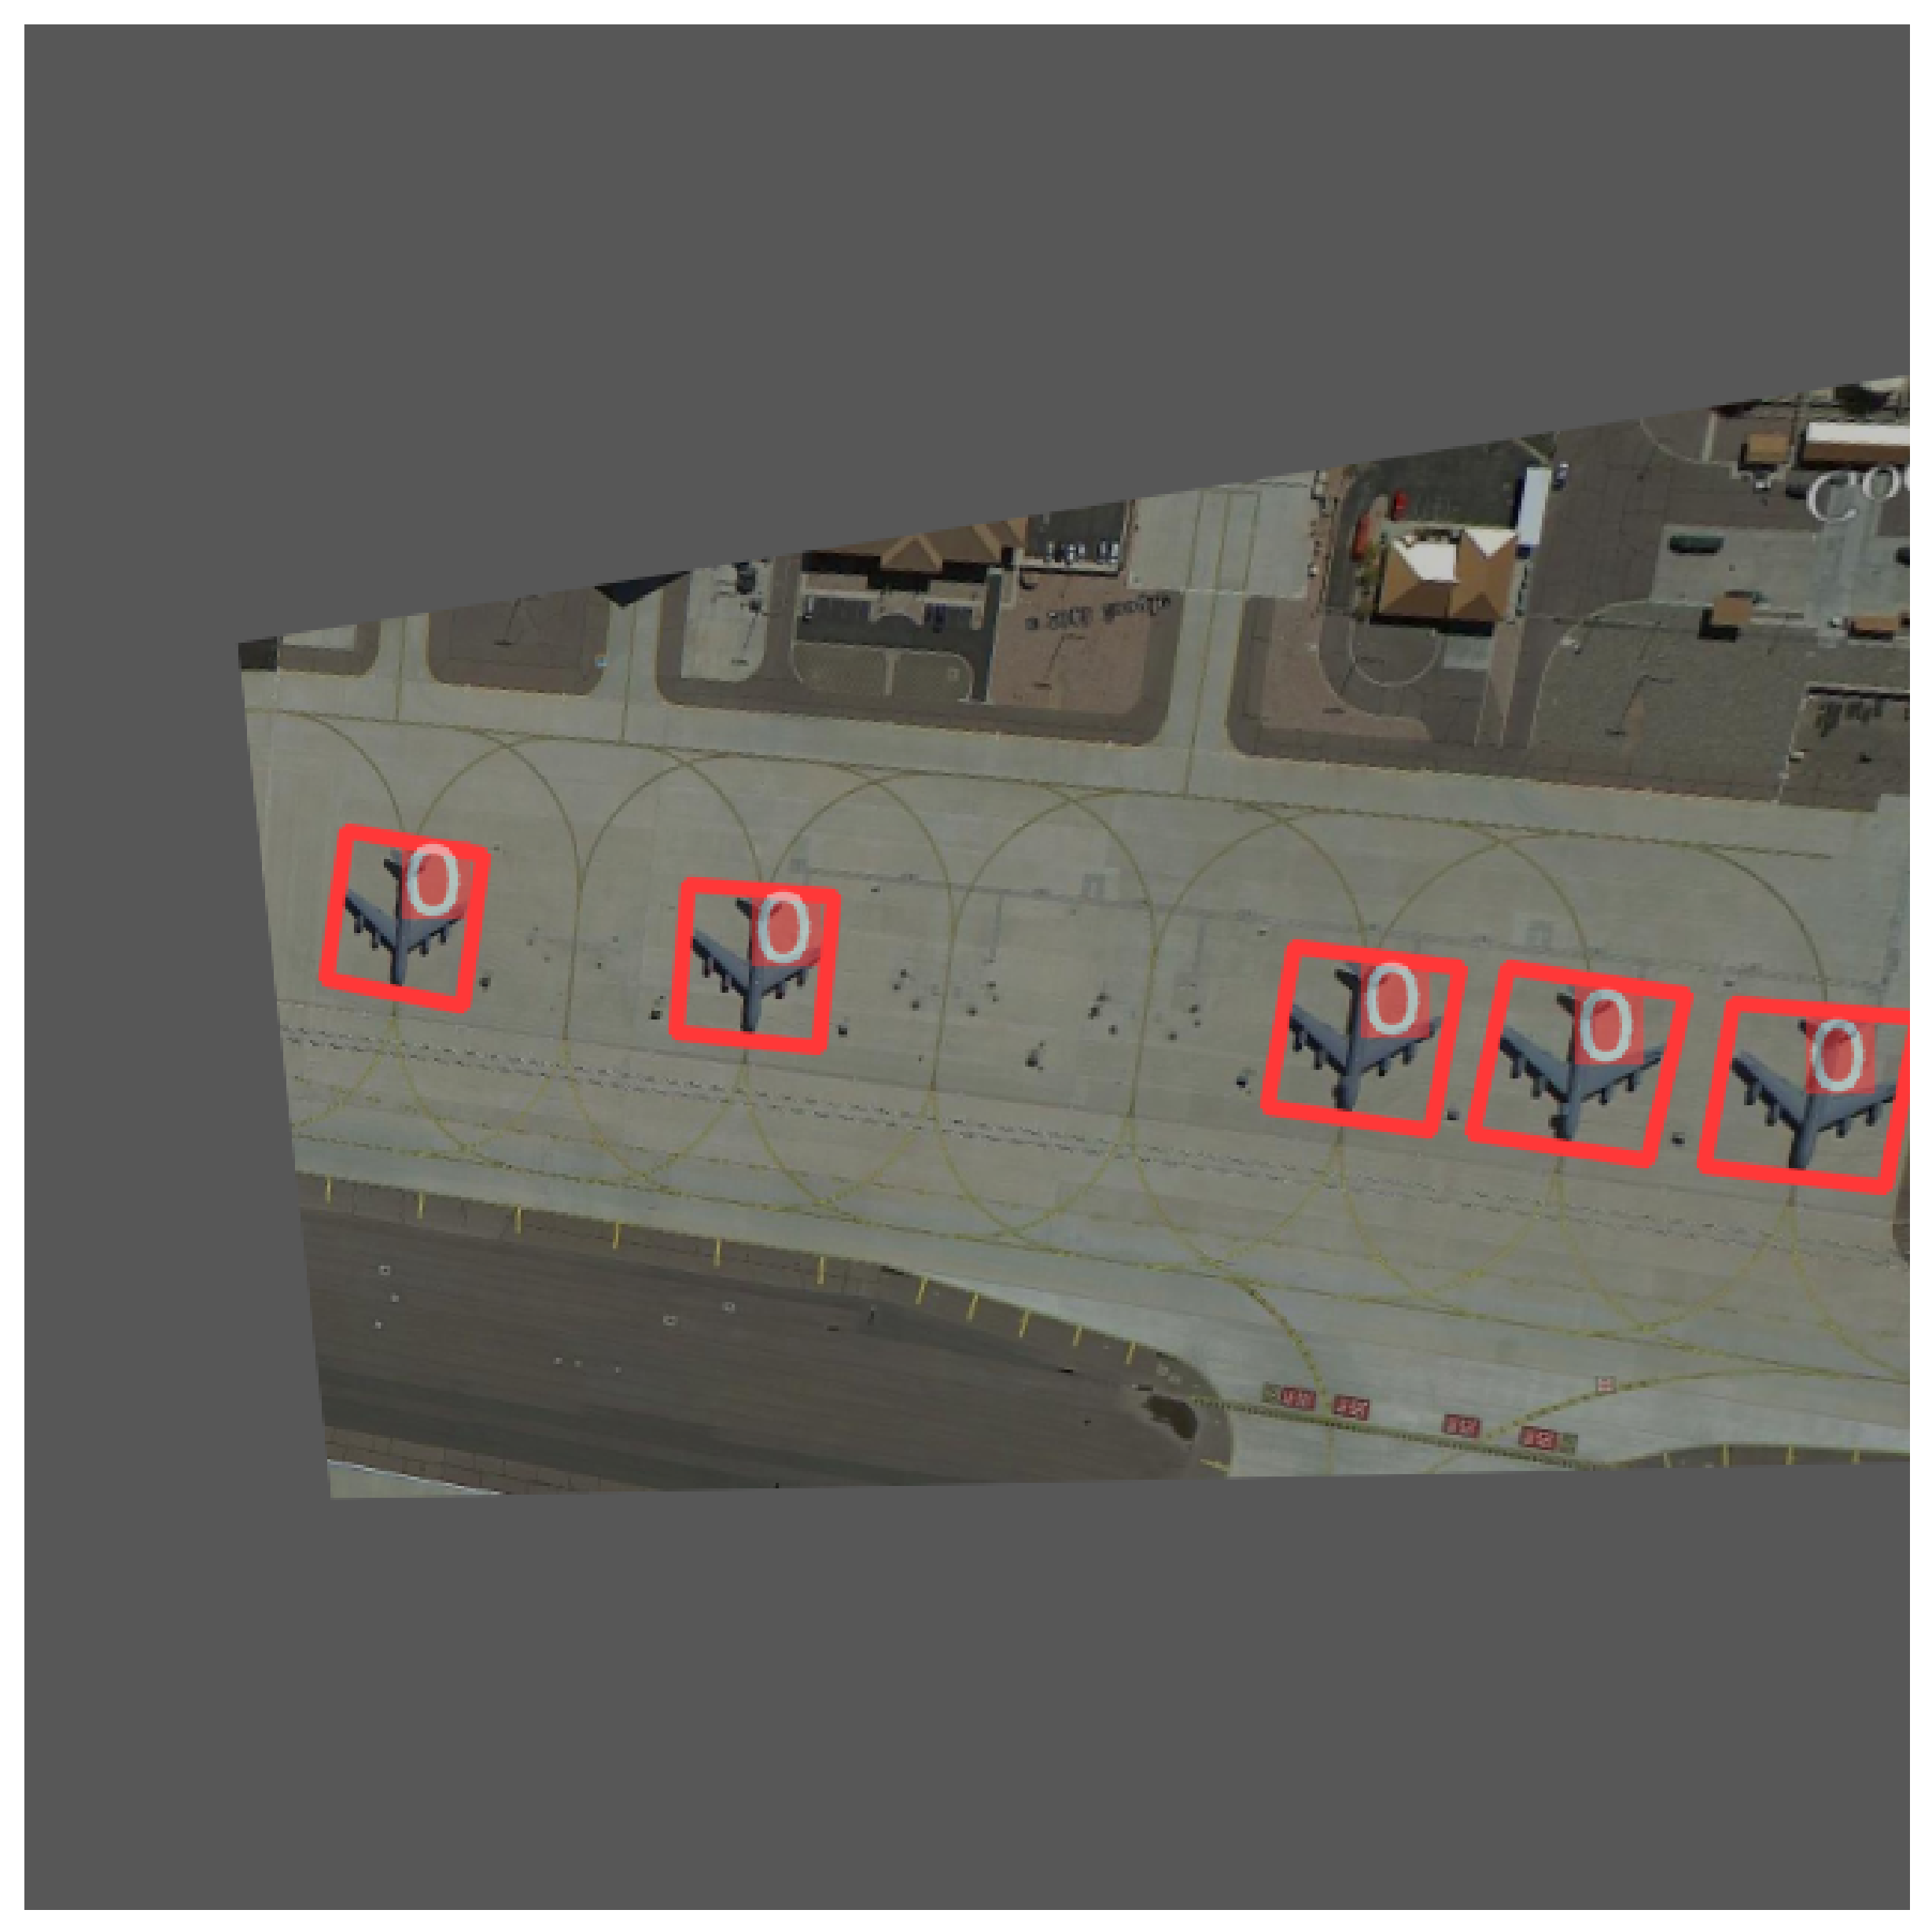

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import yaml
from utils.datasets import create_dataloader
from utils.plots import polygon_plot_images

%matplotlib inline
    
path = "../UCAS50/images/train"
hyp_dir = "data/hyp.ucas.yaml"
imgsz = 640
batch_size = 1
stride = 32
pad = 0

with open(hyp_dir) as f:
    hyp = yaml.safe_load(f)  # load hyps
# hyp['mixup'] = 1.0    # Modify hyperparameters
# hyp['mosaic'] = 1.0    # Modify hyperparameters
print(hyp)

dataloader, dataset = create_dataloader(path, imgsz, batch_size, int(stride), True,
                                       hyp=hyp, cache=False, rect=False, rank=-1,
                                       world_size=1, augment=True,
                                       pad=pad, workers=0, polygon=True)


imgs, tgts, *_ = next(iter(dataloader))

plt.figure(figsize=(24, 16), dpi=200)
plt.imshow(polygon_plot_images(imgs, tgts))
plt.axis('off')

In [5]:
# Train polygon-YOLOv5s on UCAS-AOD train (a small subset of original data, contain only 40 images) for 3 epochs
# Link: https://github.com/XinzeLee/PolygonObjectDetection/tree/main/UCAS50
!python polygon_train.py --weights polygon-yolov5s-ucas.pt --cfg polygon_yolov5s_ucas.yaml \
    --data polygon_ucas.yaml --hyp hyp.ucas.yaml --img-size 1024 \
    --epochs 3 --batch-size 12 --noautoanchor --polygon --cache

YOLOv5 🚀 0d55d0b torch 1.9.0+cu102 CUDA:0 (NVIDIA Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=12, bbox_interval=-1, bucket='', cache_images=True, cfg='./models/polygon_yolov5s_ucas.yaml', data='./data/polygon_ucas.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='./data/hyp.ucas.yaml', image_weights=False, img_size=[1024, 1024], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=True, nosave=False, notest=False, polygon=True, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=12, upload_dataset=False, weights='polygon-yolov5s-ucas.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, 

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see labels, predictions and augmentation effects. If want to use mosaic effects in **DataLoader**, please modify data/hyp.ucas.yaml or related files

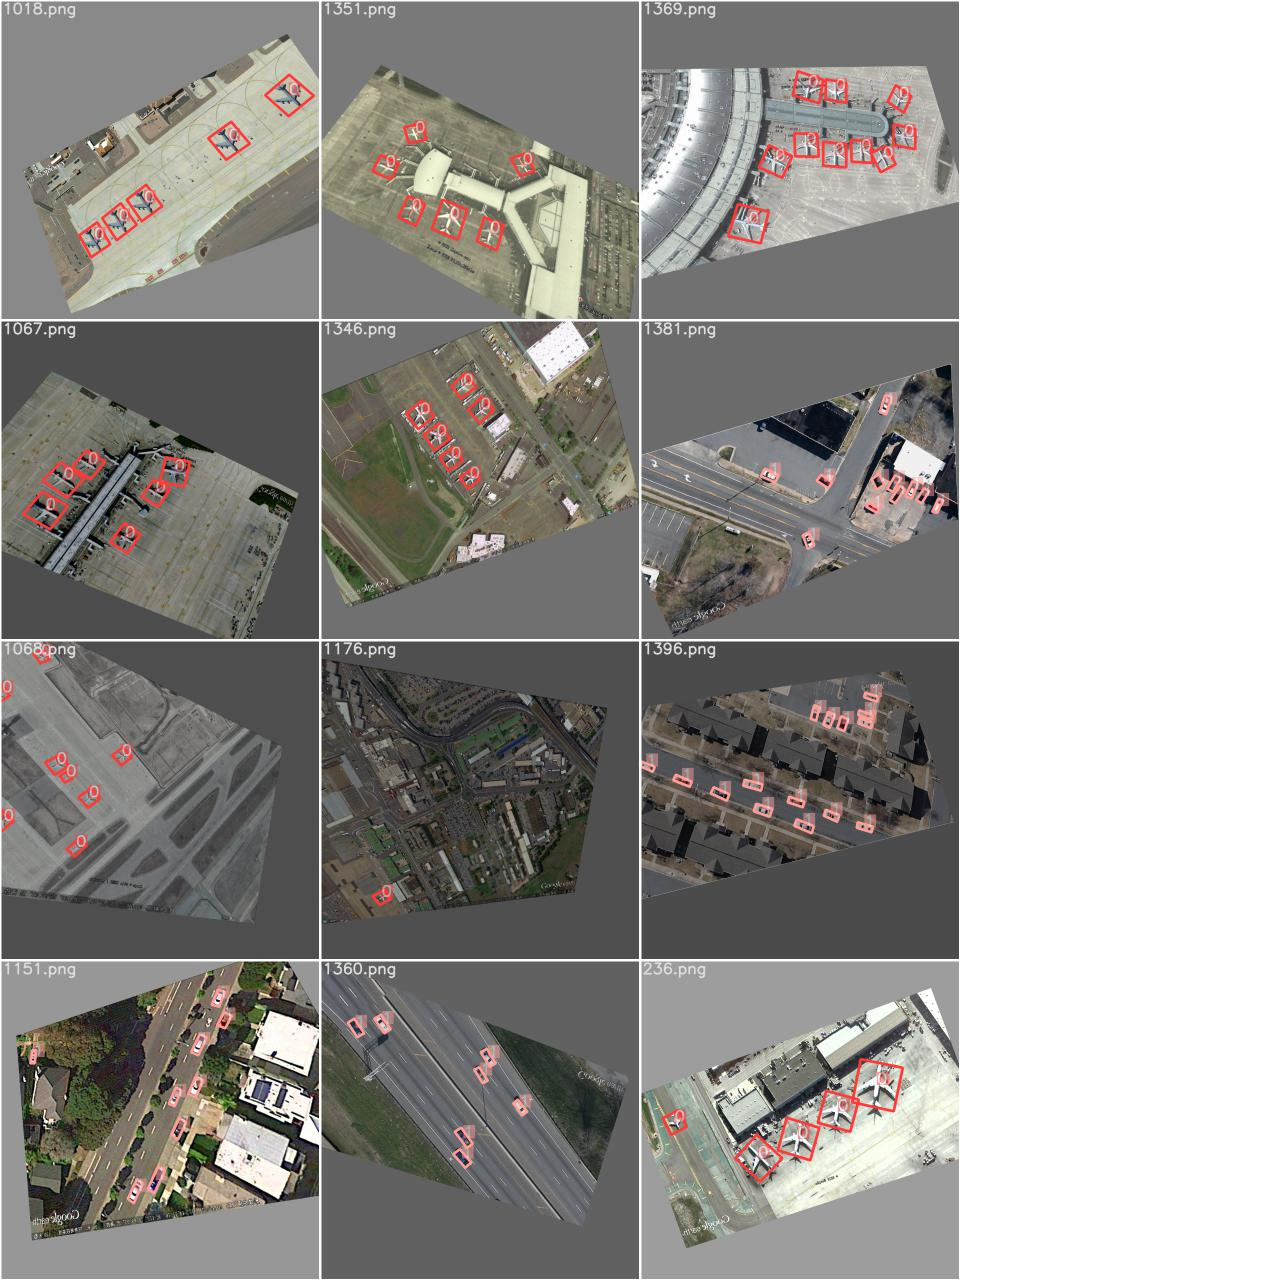

In [6]:
from IPython.display import Image

Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 labels
# Image(filename='runs/train/exp/train_batch1.jpg', width=800)  # train batch 1 labels
# Image(filename='runs/train/exp/train_batch2.jpg', width=800)  # train batch 2 labels

Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes.

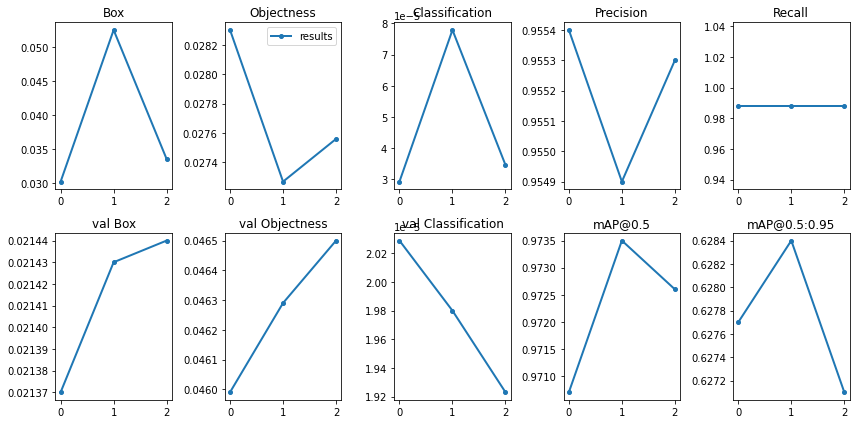

In [7]:
from IPython.display import Image, display

from utils.plots import plot_results
# notest=True in training, so val losses are not available in the following figures
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png

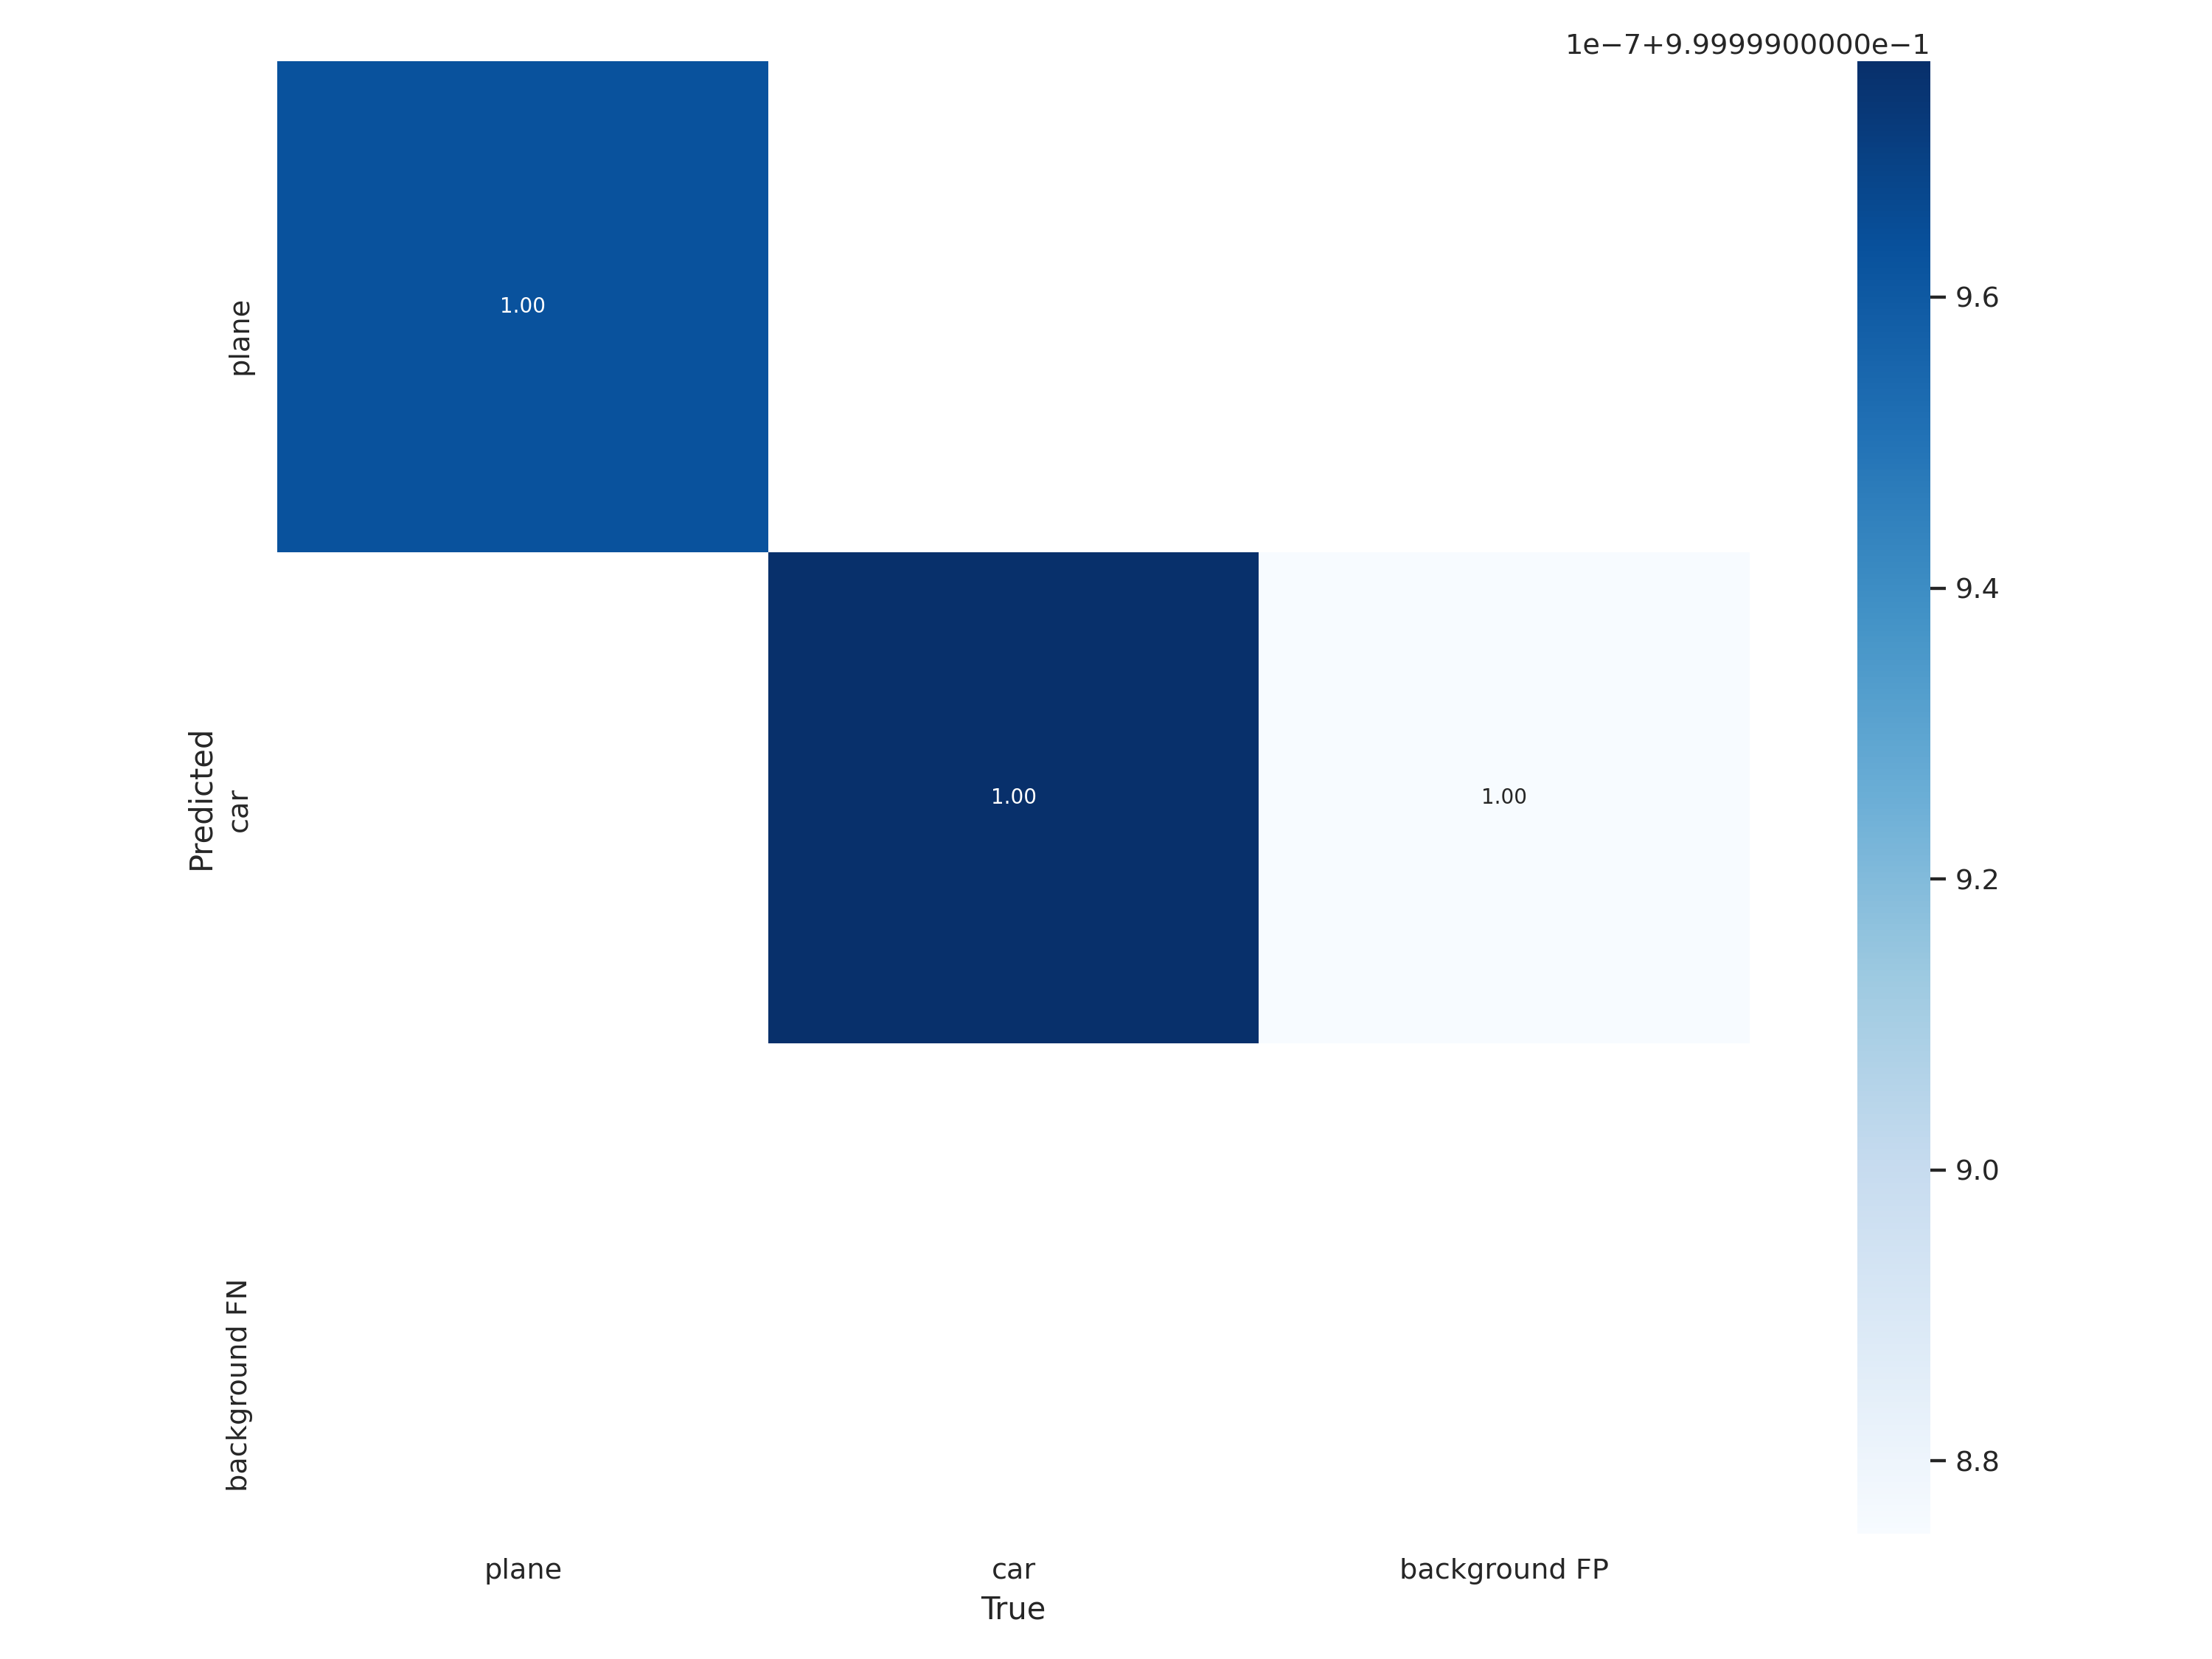

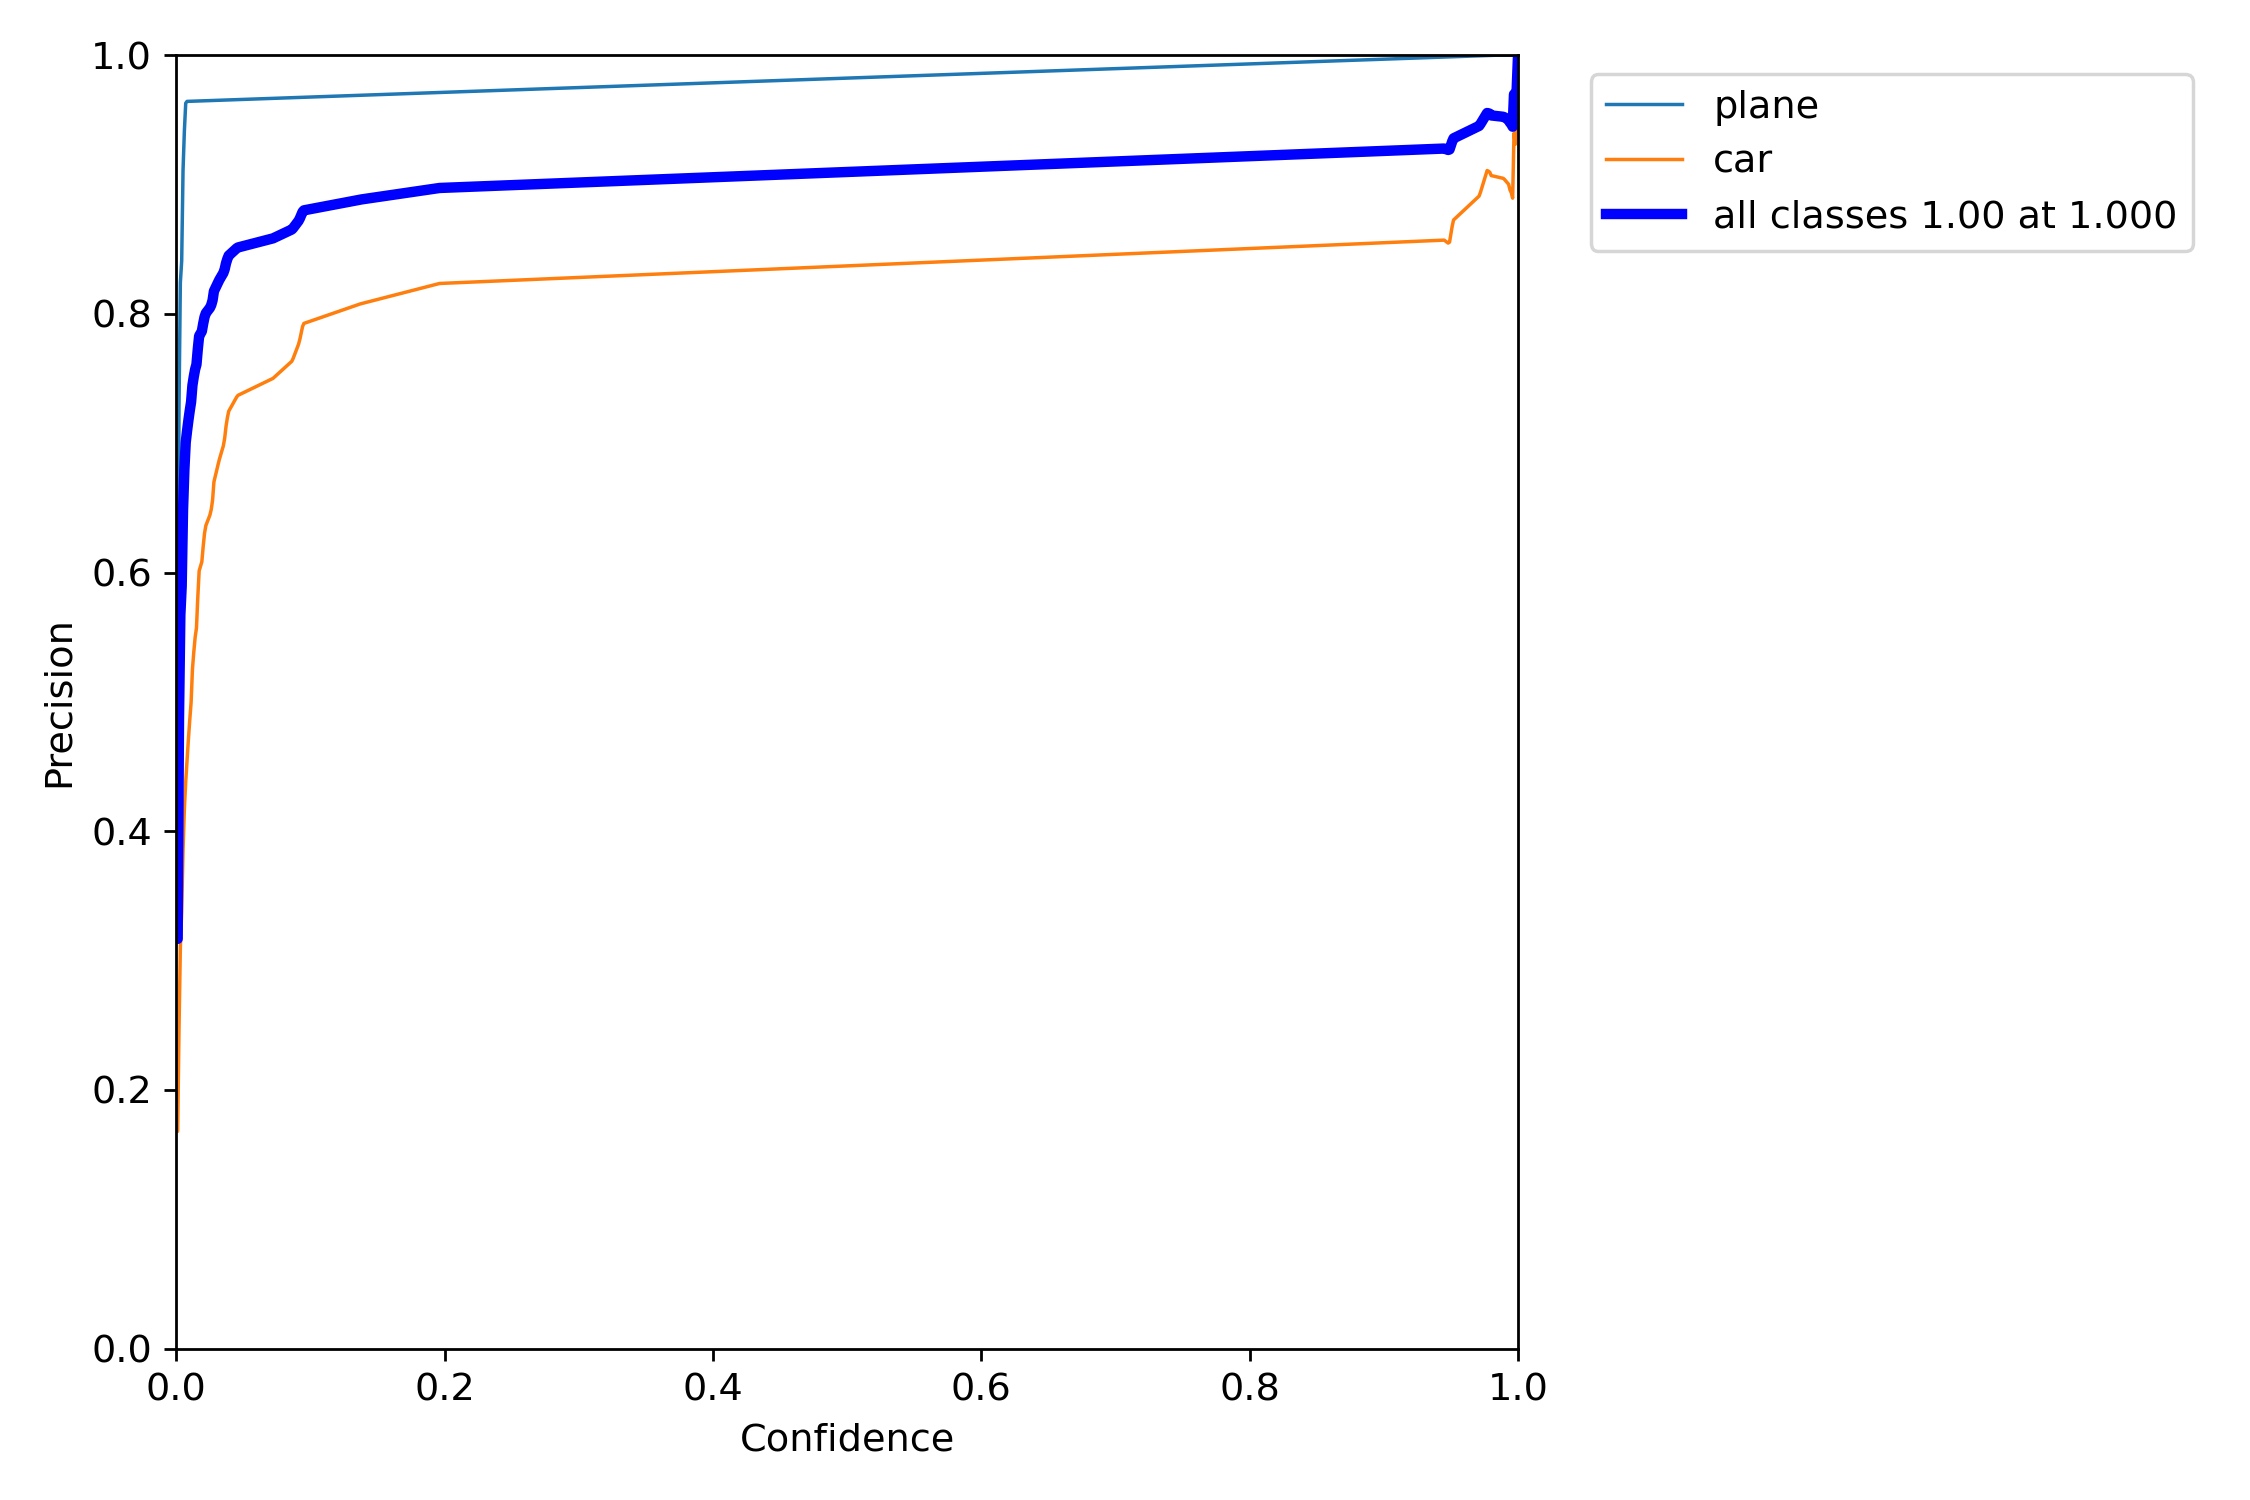

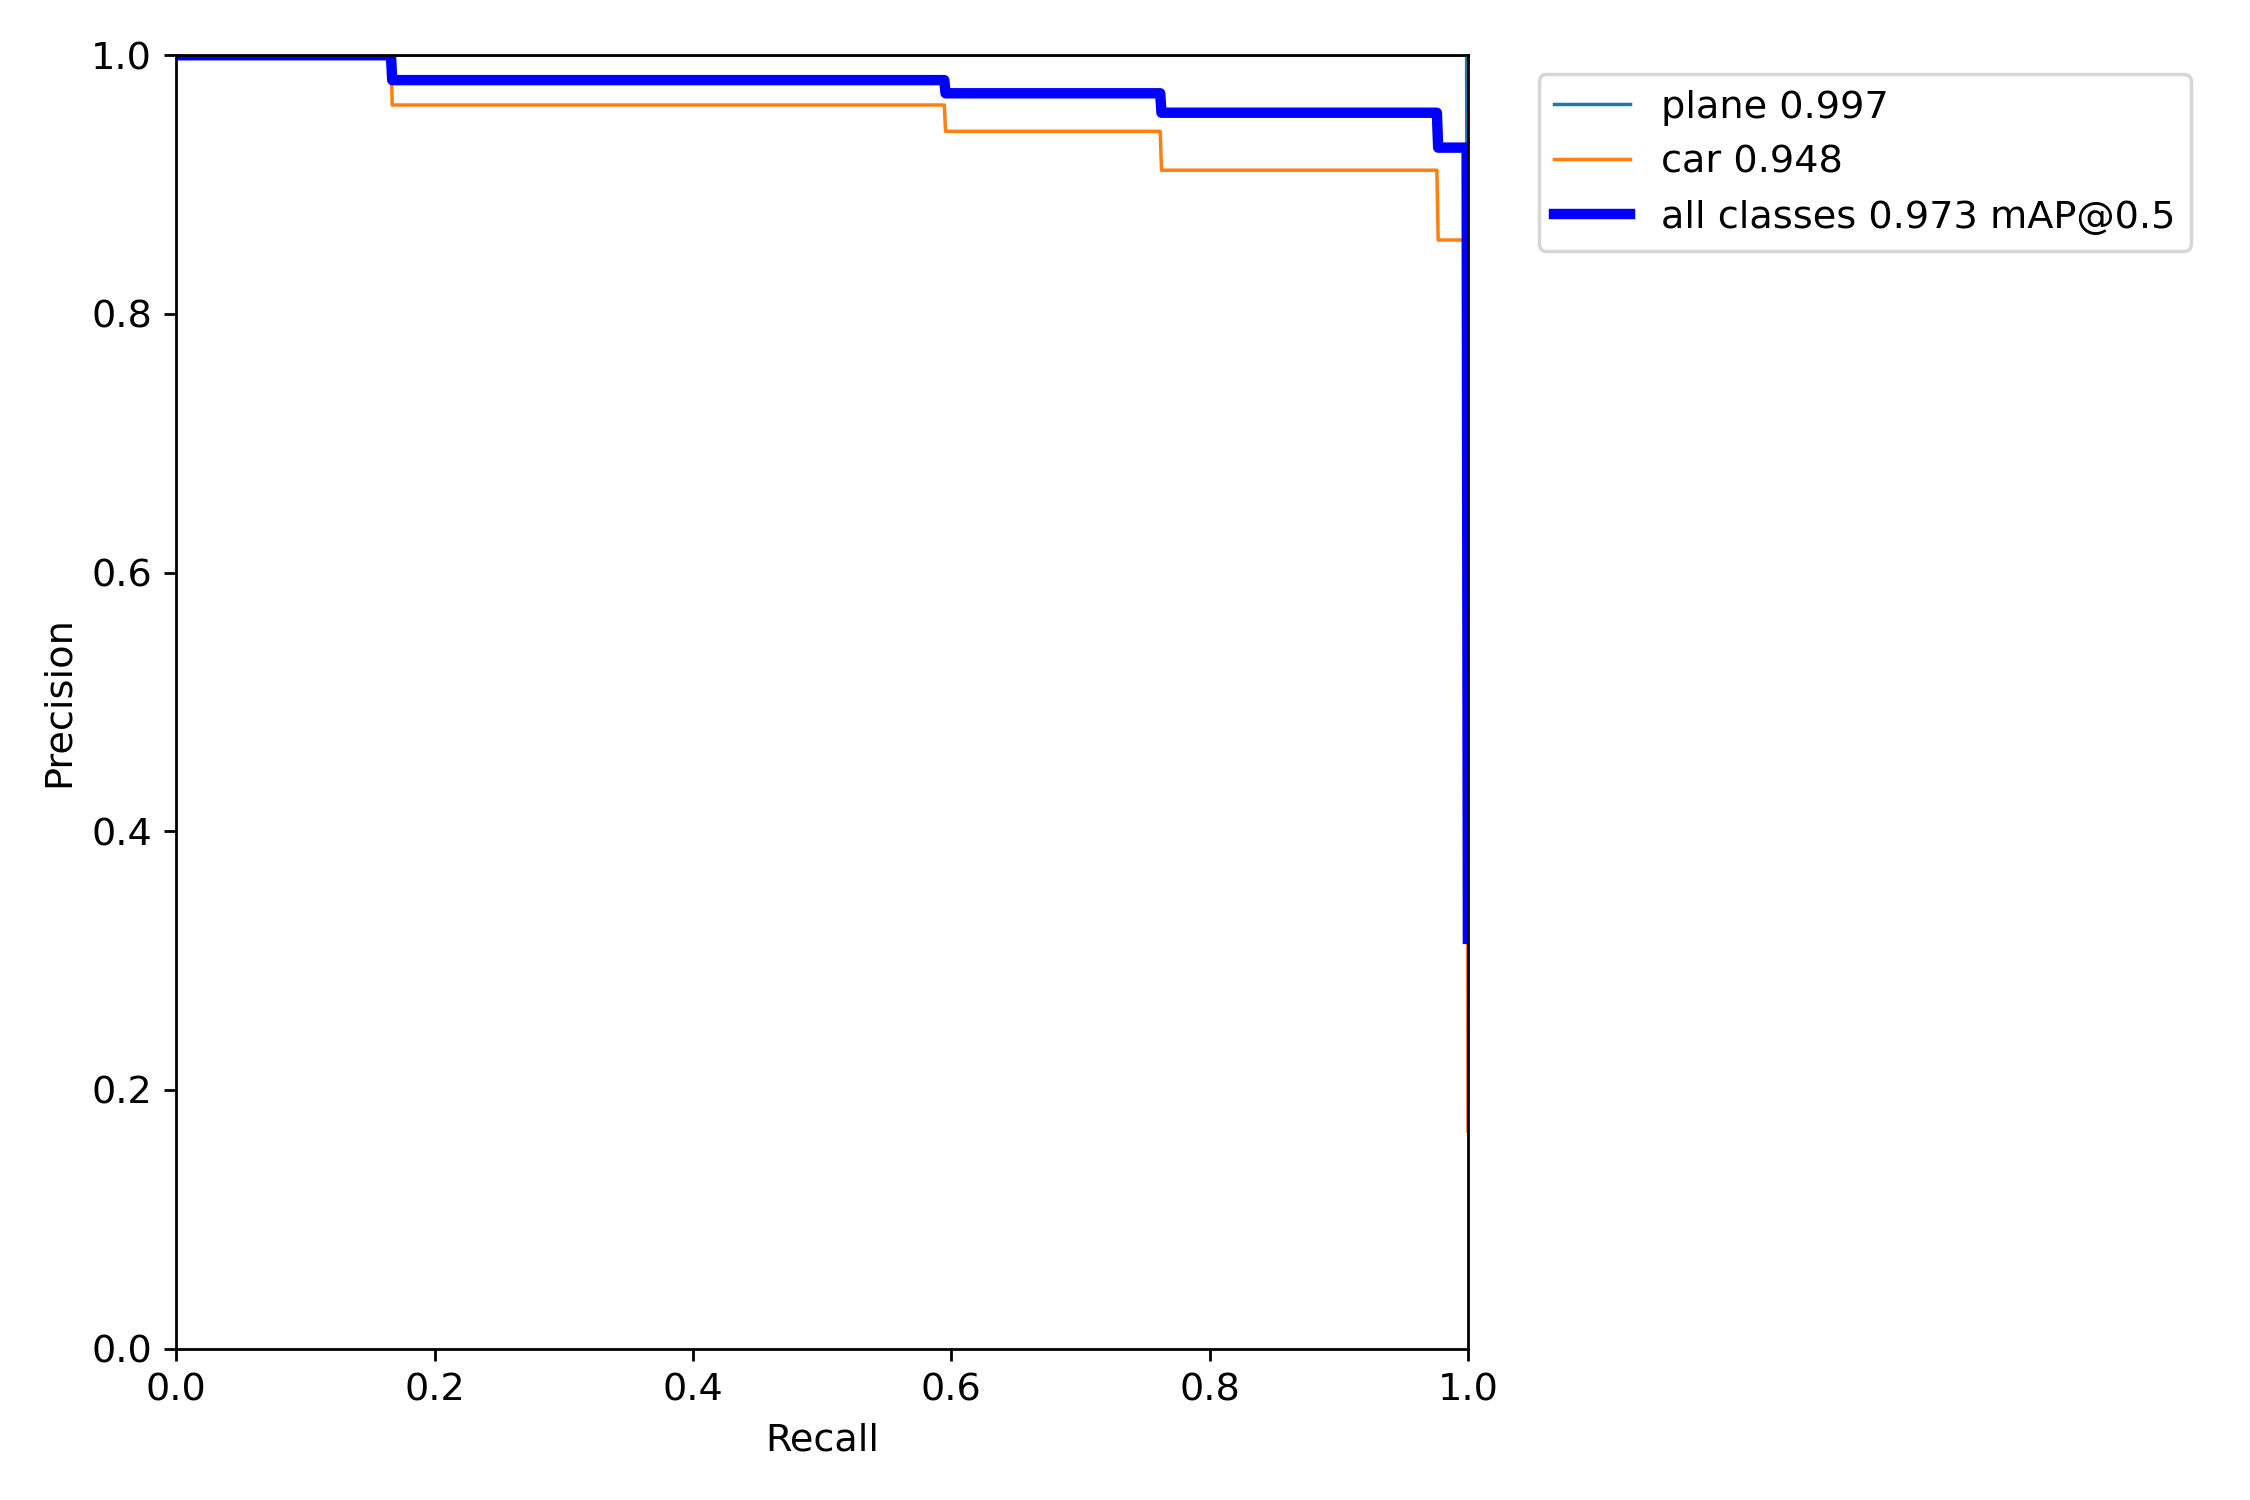

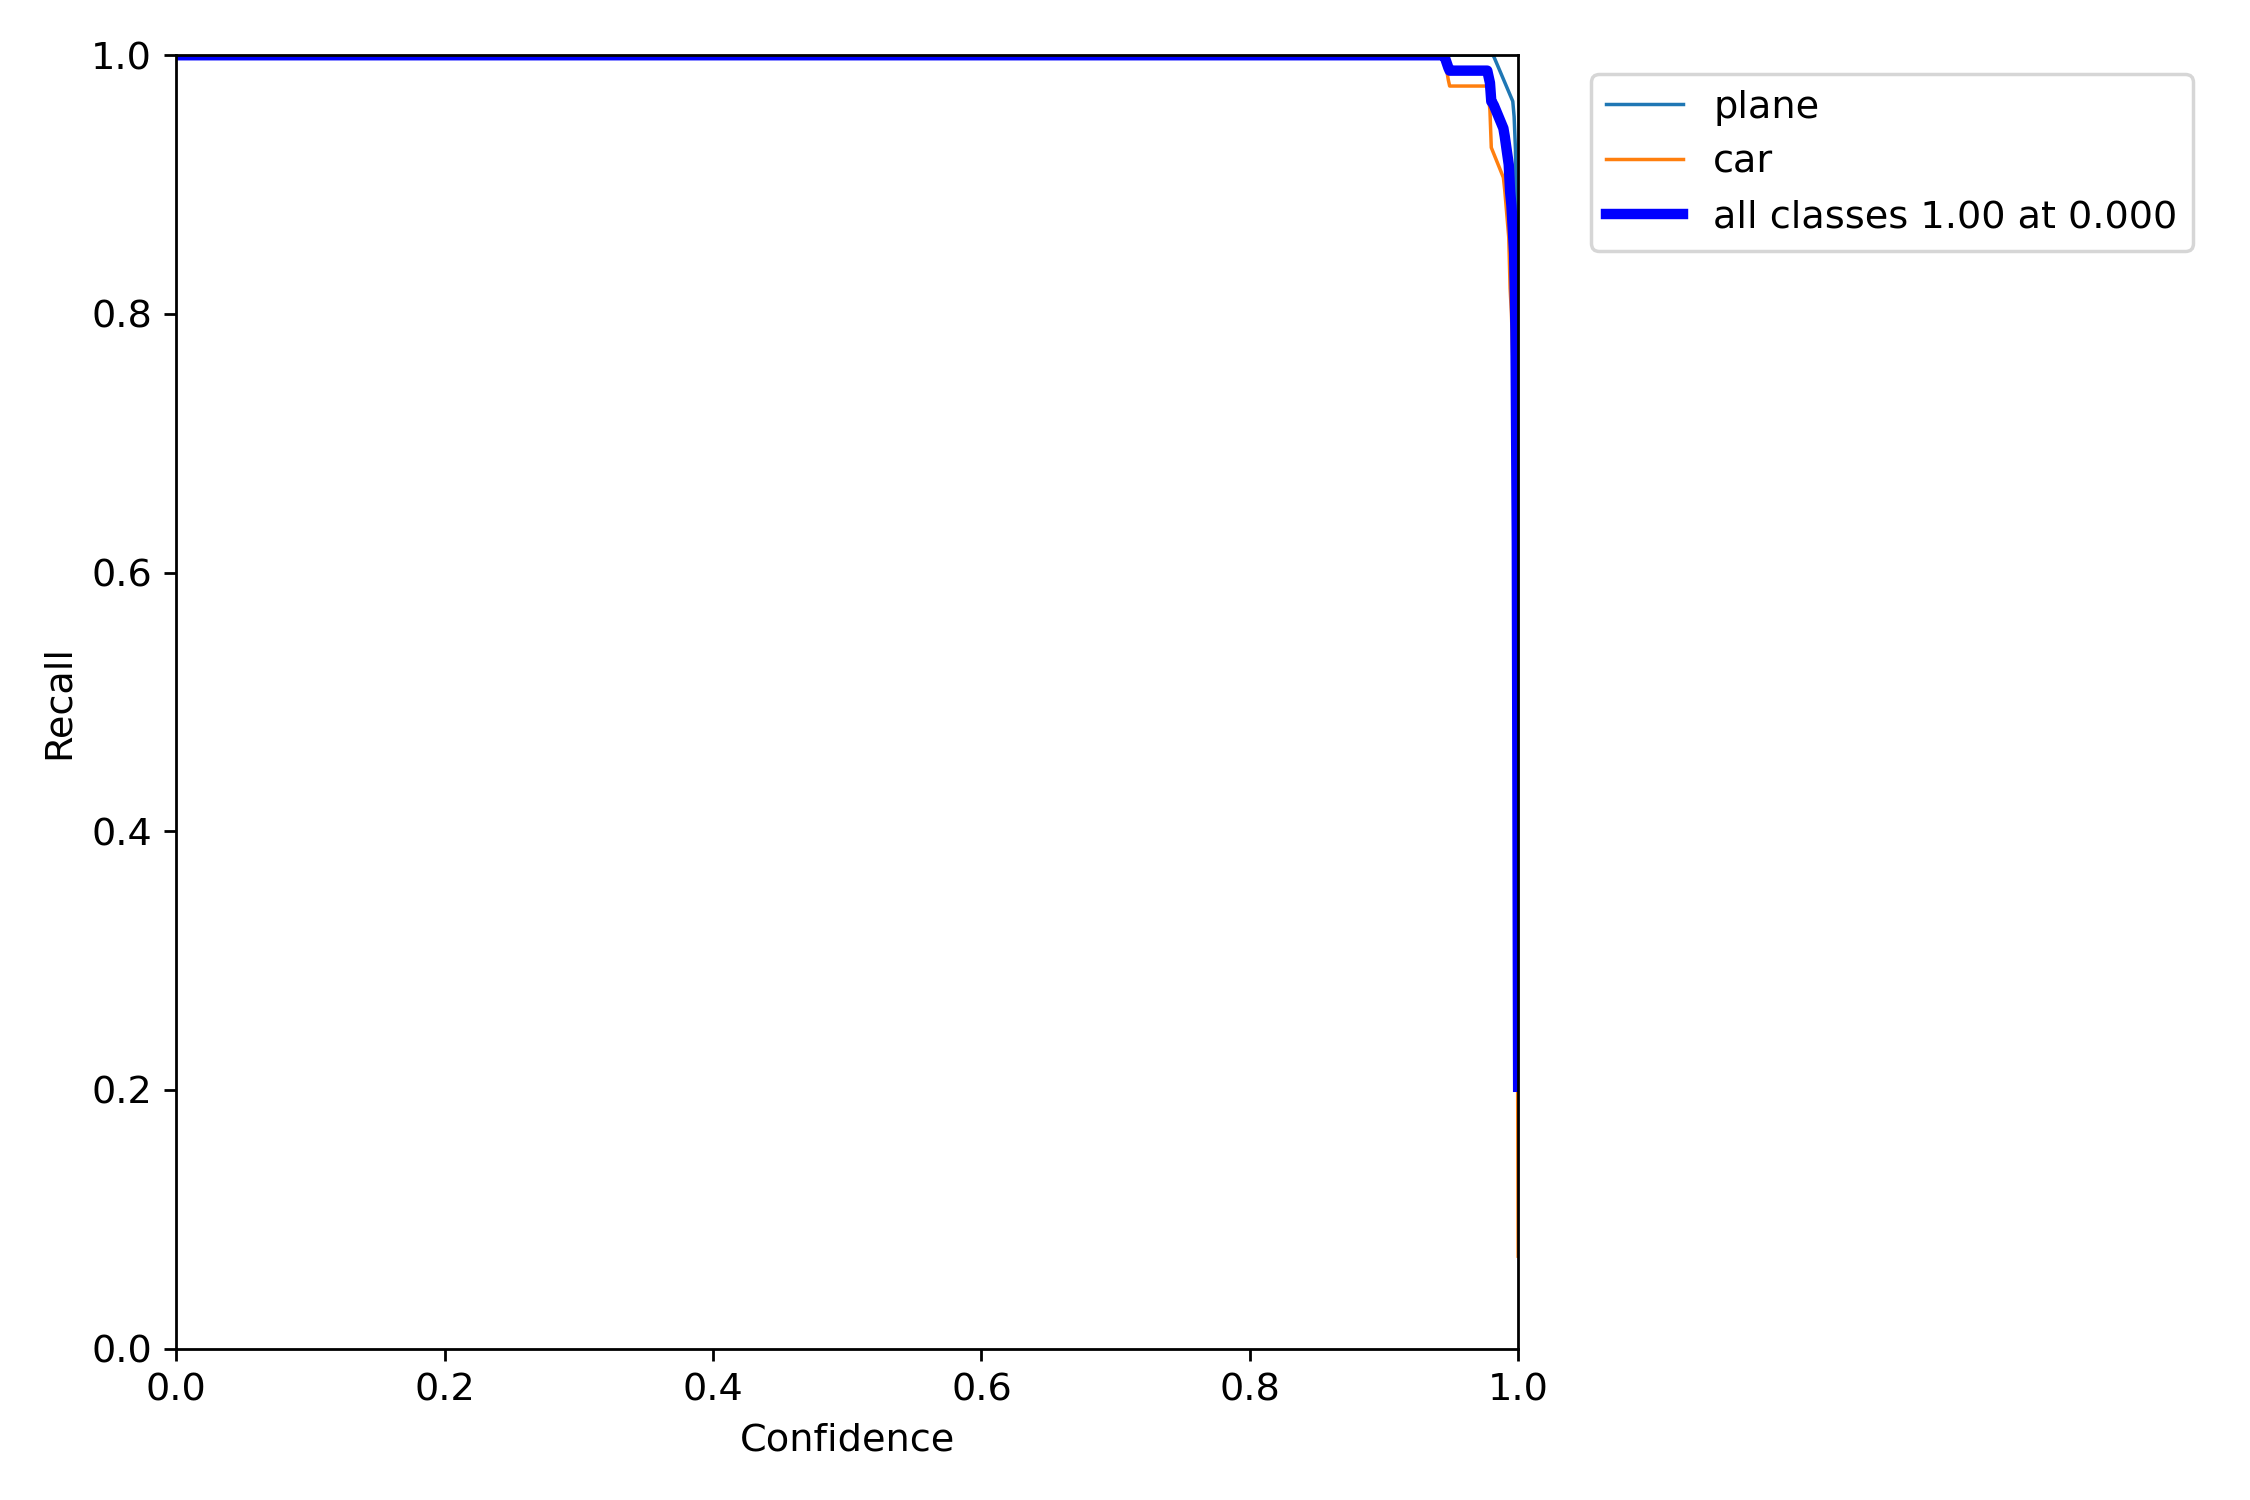

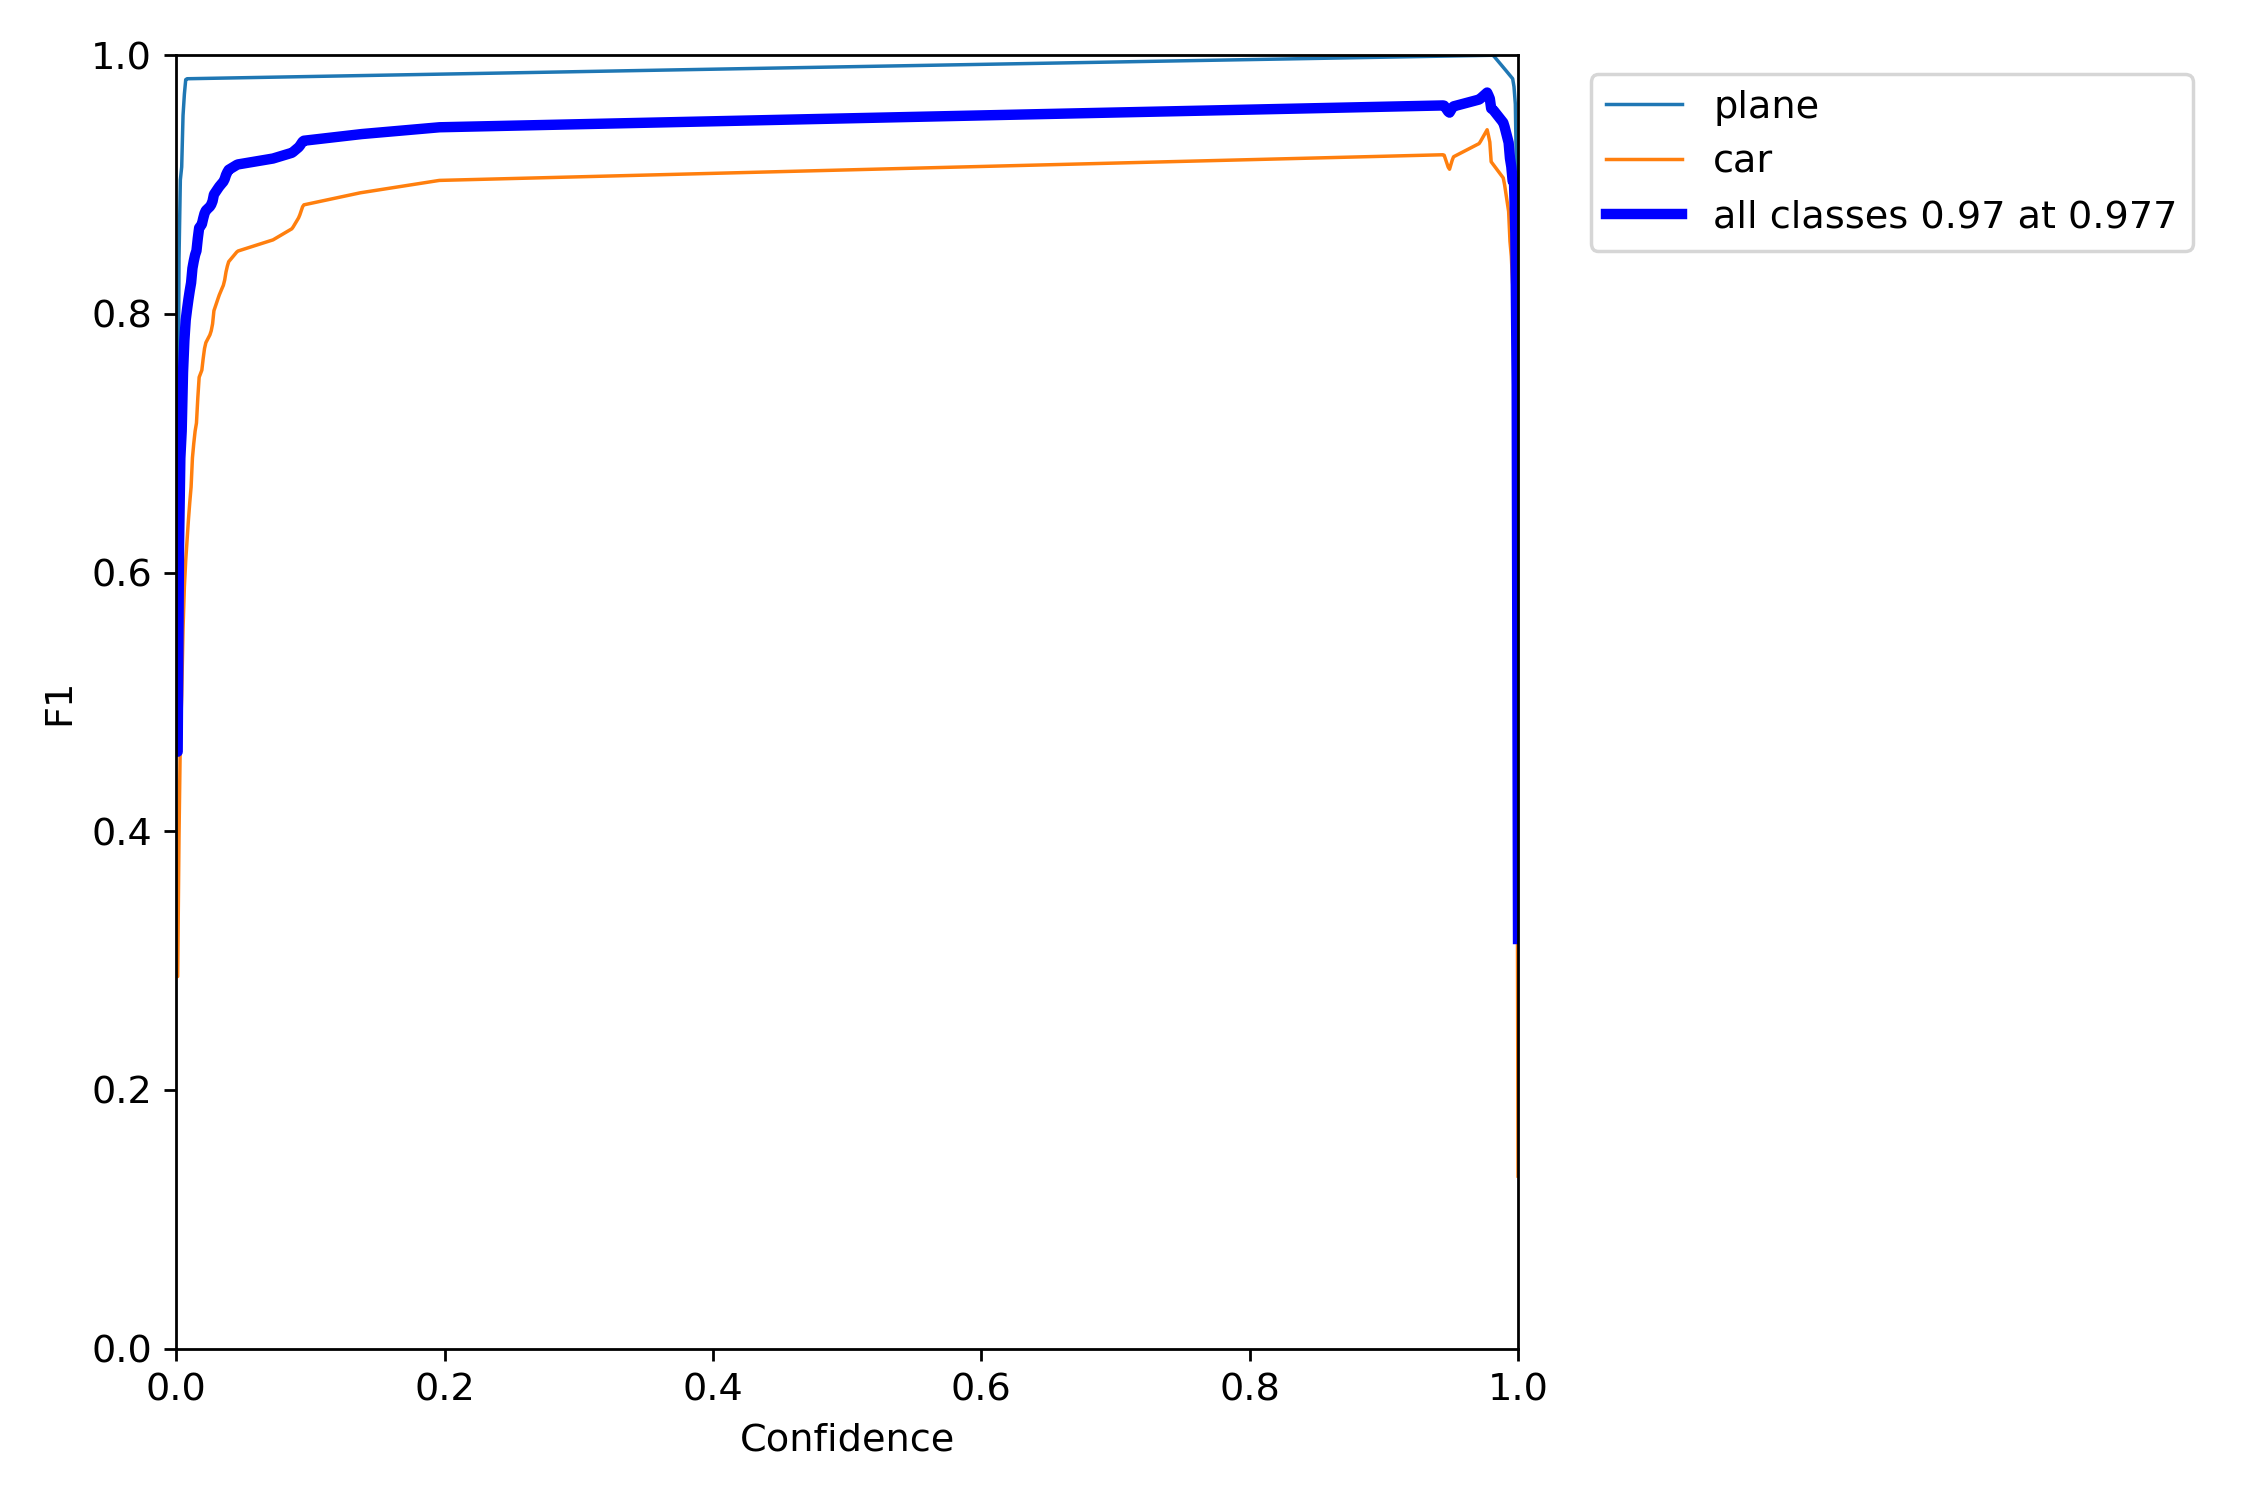

In [8]:
from pathlib import Path
from IPython.display import Image, display

result_dir = Path('runs/train/exp')

files = ['confusion_matrix.png', 'P_curve.png', 'PR_curve.png', 'R_curve.png', 'F1_curve.png']

for file in files:
    display(Image(filename=str(result_dir/file), width=800))